In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
import os
# Prints current working directory.
#os.getcwd()
# Change working directory.
os.chdir("/scratch/w40/gp8431/run")
# List files in the current directory.
#os.listdir()

In [2]:
# Import xarray for data analysis.
import xarray as xr

In [3]:
# Extract rt52 monthly-averaged data for a given month - this will only
# have one element in its time dimension, so use the 'squeeze' function
# to remove this time dimension.
era = xr.open_dataarray("/g/data/rt52/era5/pressure-levels/monthly-averaged//t/2019/t_era5_moda_pl_20190801-20190831.nc").squeeze()

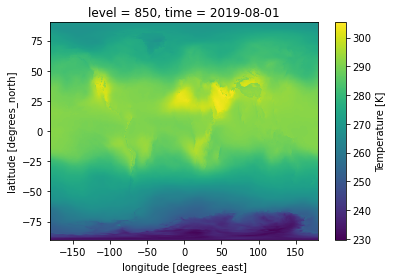

In [4]:
# Plot the era data exracted above.
# You can see the continents!
era.sel(level = 850).plot()

In [5]:
# Rename variables in the era dataset so that it can be directly
# compared to the model.
era = era.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

In [6]:
os.chdir("/home/561/gp8431")
from climate import StandardGrid


<xarray.DataArray 't' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
    pfull    int32 850
    time     datetime64[ns] 2019-08-01
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


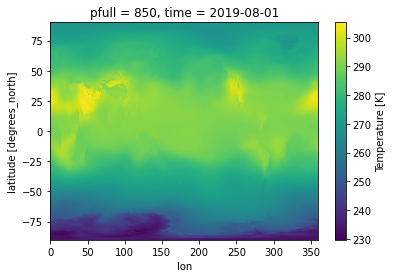

In [11]:
# Interpolate era data onto the coarser model grid (same for ih and nh)
# The below line has an ac term related to importation - how to import?
#erai = ac.StandardGrid(era)

# Shift the longitude of era, then interpolate onto a coarser grid.
# This order produces a non-physical plot - redefine discontinuity?
# For now, I will manually shift all longitude values rather than using
# the StandardGrid function.
# TEST AOSTOOLS
## era['lon'] = (era['lon'] + 180.0)
# If we define erai as StandardGrid(era), then the below line should read
# 'erai.interp_like...'
#erai = era.interp_like(ih.mean('time'))
#eran = era.interp_like(nh.mean('time'))
# era_interp = era.interp_like(ihd_avg)

# erai = era_interp

erai = StandardGrid(era, lon_name='lon', lat_name='lat')

#eran = era.interp_like(nhd_avg)
#erai = StandardGrid(era)
# We could also try simply adding a value of 180 to the era longitude 
# before interpolation and comparing the result with the StandardGrid

# Plot!
erai.sel(pfull = 850).plot()
print(erai.sel(pfull = 850))
#eran.sel(pfull = 850).plot()
#print(erai_nh)
#print(nh.mean('time'))

## NOTE: era = SG(era) and plot returns correct long/lat